In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import seaborn as sns

In [2]:
df=pd.read_csv("C:\python code\Intro to Data Science\laptop-prices-analysis\Data\processed\merge_dataset.csv", index_col = 0)
# df = df.drop(columns = ["Unnamed: 0"])
df

,Brand,CPU Name,CPU Mark,GPU Name,GPU Mark,Monitor,Width,Height,RAM,Storage Amount,OS,Weight,Price
0,HP,AMD Ryzen 5 5500U,13144.0,Intel UHD Graphics,1476.0,17.3,1920,1080,32.0,512.0,Windows 11,1.77,733.50
1,HP,Intel Core i7 1165G7 2.80GHz,10346.0,Intel Iris Xe,2690.0,15.6,1920,1080,12.0,256.0,Windows 11,1.77,886.78
2,HP,Intel Core i3 1115G4 3.00GHz,6132.0,Intel UHD Graphics,1476.0,15.6,1920,1080,8.0,256.0,Windows 10,2.00,375.00
3,HP,Intel Core i5 4302Y 1.60GHz,2028.0,Intel UHD Graphics,1476.0,12.5,1366,768,8.0,256.0,Windows 10,0.98,209.98
4,HP,Intel Core i9 13900H,29690.0,Intel Iris Pro Graphics 6200,1449.0,16.0,3840,2400,64.0,2048.0,Windows 11,1.75,4816.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,Dell,Intel Core i5 1135G7 2.40GHz,9891.0,Intel HD Graphics 620,926.0,15.6,1920,1080,32.0,1024.0,Windows 11,1.88,572.09
9201,Dell,Intel Core i7 2620M 2.70GHz,2443.0,Intel Arc,4253.0,13.0,1920,1080,16.0,256.0,Windows 11,0.77,999.99
9202,Apple,Apple M3 Pro 11 Core,23805.0,Intel Iris Xe,3013.0,14.2,3024,1964,36.0,4096.0,Windows 10,1.60,3599.00
9203,Lenovo,Intel Core i7 1250U,12421.0,Intel HD Graphics 620,926.0,14.0,1920,1080,16.0,256.0,Windows 10,1.77,515.00


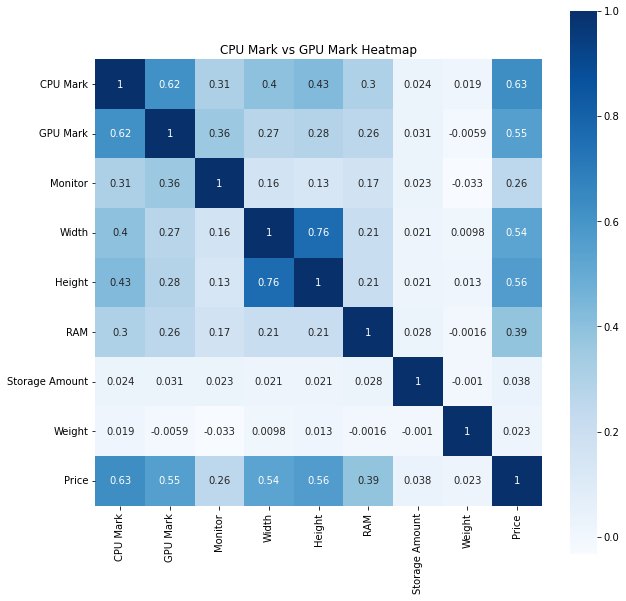

In [3]:
plt.figure(figsize=(10,10))
heatmap_data = df.corr(method='pearson')

sns.heatmap(heatmap_data,vmax=1,square=True,annot=True,cmap='Blues');
plt.title('CPU Mark vs GPU Mark Heatmap')
plt.show()

The heatmap shows the relationship between two random variables of our laptop data. In the context of laptop price prediction, the price has a strong relationship with GPU Mark and CPU Mark. To conclude, we focus on depicting the relationship of price and the 2 catergories. 

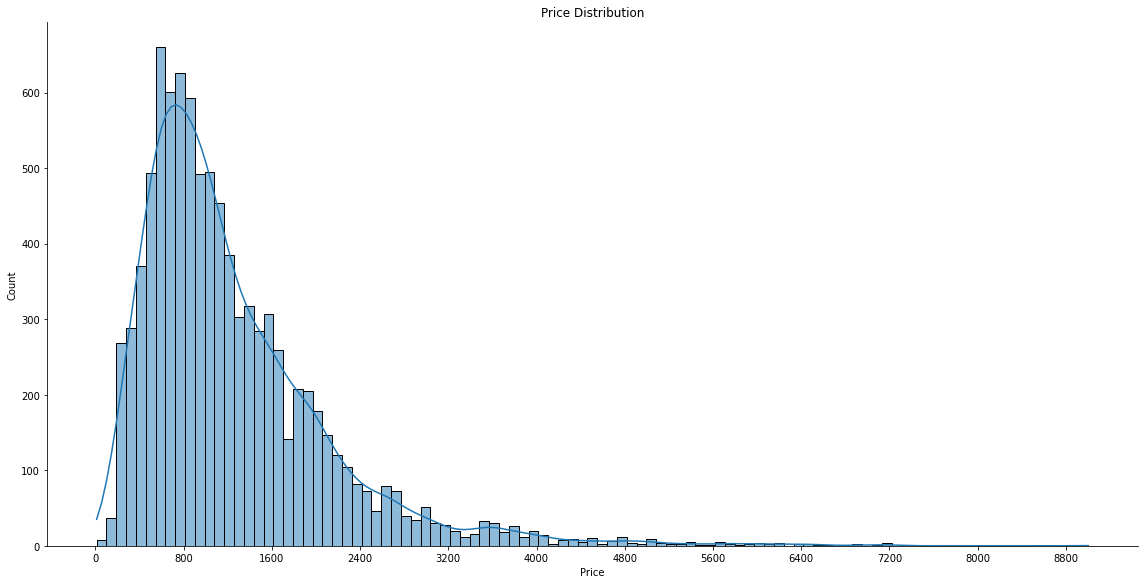

In [4]:
sns.displot(data=df, x="Price", kde=True, height=8, aspect=2)
plt.xticks(np.arange(0, df['Price'].max(), 800));
plt.title('Price Distribution');


The bar charts shows the price distribution of laptop datasets. 50 percent of laptops has price in range of 750 and 1750 USD, however, the price of laptops ranges between 0 and over 6000. All laptops have price over 3000 is considered as outliers.

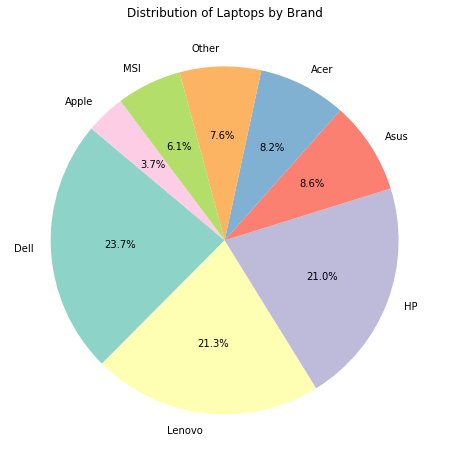

In [5]:
# Count the number of laptops for each brand
brand_counts = df['Brand'].value_counts()

# Identify brands with less than 3% of the total laptops
threshold = 0.03
small_brands = brand_counts[brand_counts / brand_counts.sum() < threshold].index

# Group small brands into an 'Other' category
df['Brand'] = df['Brand'].apply(lambda x: 'Other' if x in small_brands else x)
brand_counts = df['Brand'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)

# Set title
plt.title('Distribution of Laptops by Brand')

# Show the plot
plt.show()

We can see that the data contains 5 popular brands, known as: Dell, Lenovo, HP, Dell, Asus, and Acer. A third of laptop dataset is Dell laptops, while all others take an account of over 10 percent each. 

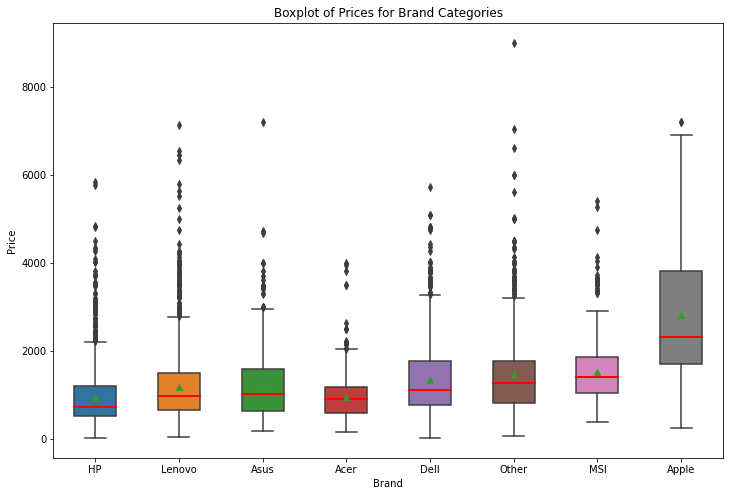

In [6]:
# Create a boxplot based on the modified categories
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df, x='Brand', y='Price', width=0.5, showmeans=True, medianprops={"color": "r", "linewidth": 2})
plt.title('Boxplot of Prices for Brand Categories')
plt.show()

The laptop dataset was mainly distributed from 1000 to 2000 USD, each brand. However, the price Dell laptops (mostly ranging from 1000 to 2000) higher than those of others. Moreover, the price of HP and Acer Laptops range under 1000 USD. 

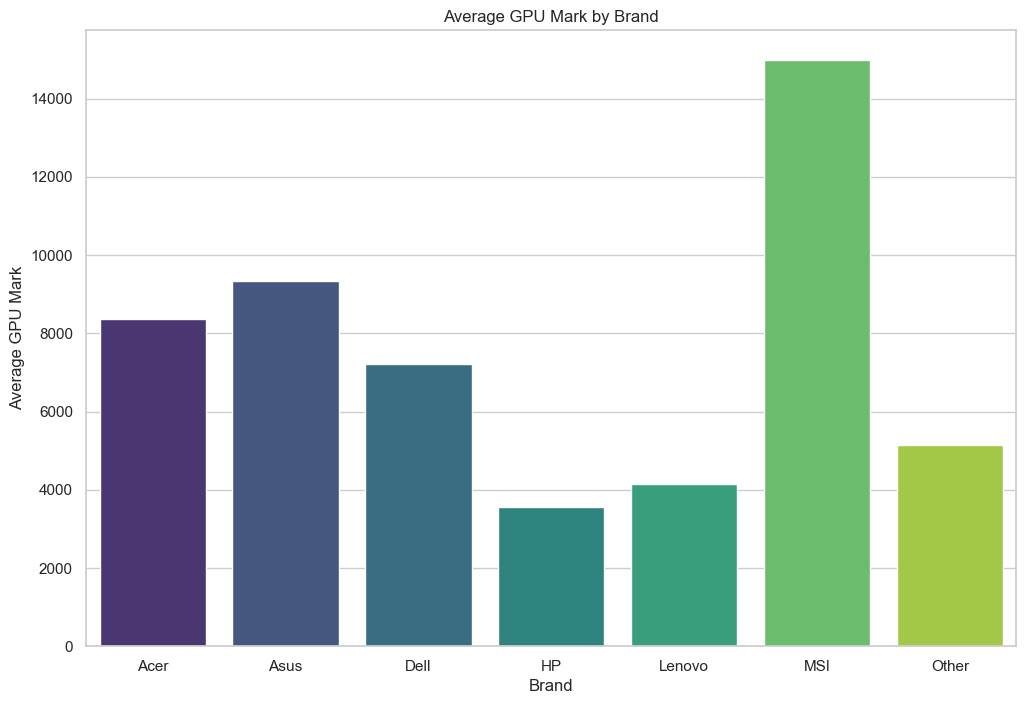

In [7]:
# Assuming df is your DataFrame

# Group by Brand and calculate the mean of GPU Mark and Price
brand_summary = df.groupby('Brand').agg({'GPU Mark': 'mean', 'Price': 'mean'}).reset_index()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='GPU Mark', data=brand_summary, palette="viridis")
plt.title('Average GPU Mark by Brand')
plt.xlabel('Brand')
plt.ylabel('Average GPU Mark')
plt.show()


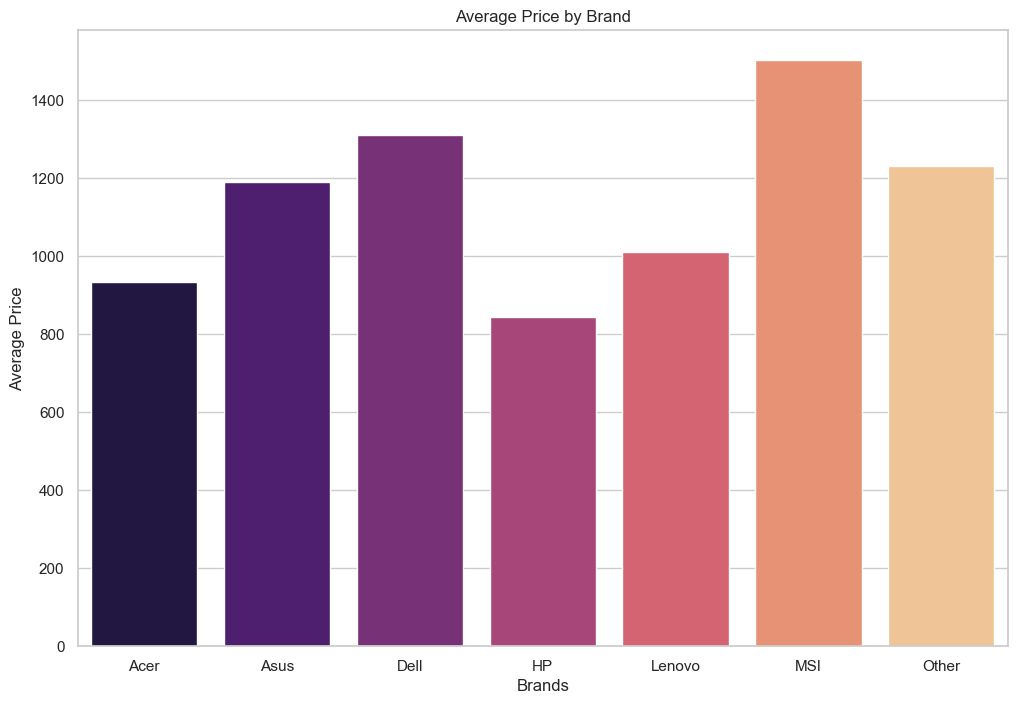

In [8]:
# Create another bar chart for Price
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='Price', data=brand_summary, palette="magma")
plt.title('Average Price by Brand')
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.show()

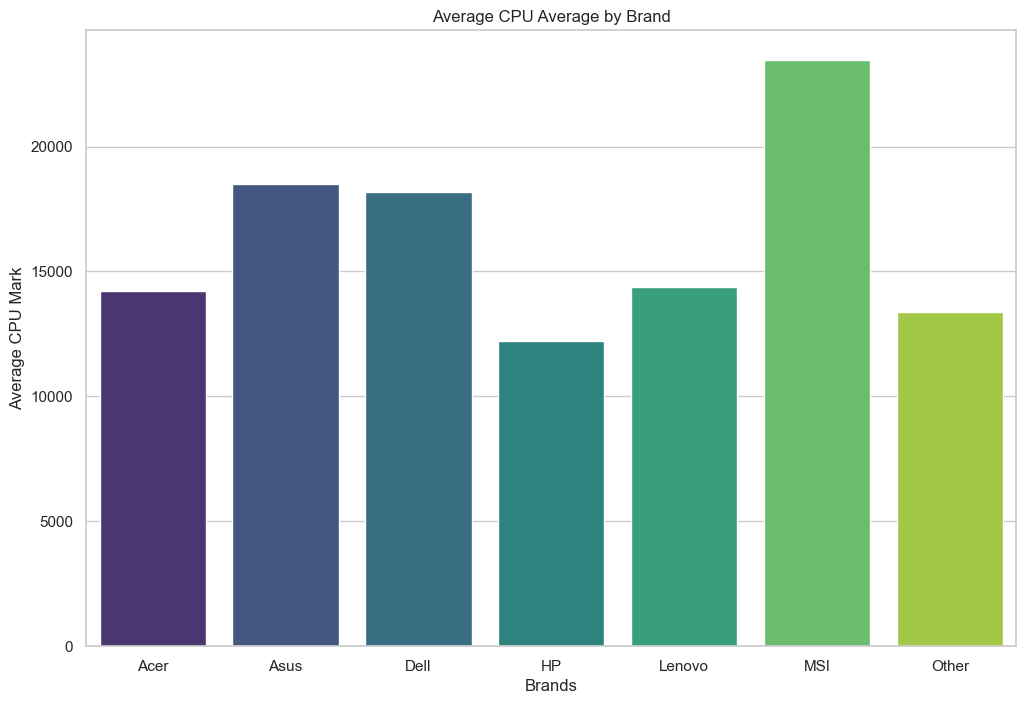

In [9]:
# Assuming df is your DataFrame

# Group by Brand and calculate the mean of GPU Mark and Price
brand_summary = df.groupby('Brand').agg({'CPU Mark': 'mean', 'Price': 'mean'}).reset_index()

# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Brand', y='CPU Mark', data=brand_summary, palette="viridis")
plt.title('Average CPU Average by Brand')
plt.xlabel('Brands')
plt.ylabel('Average CPU Mark')
plt.show()


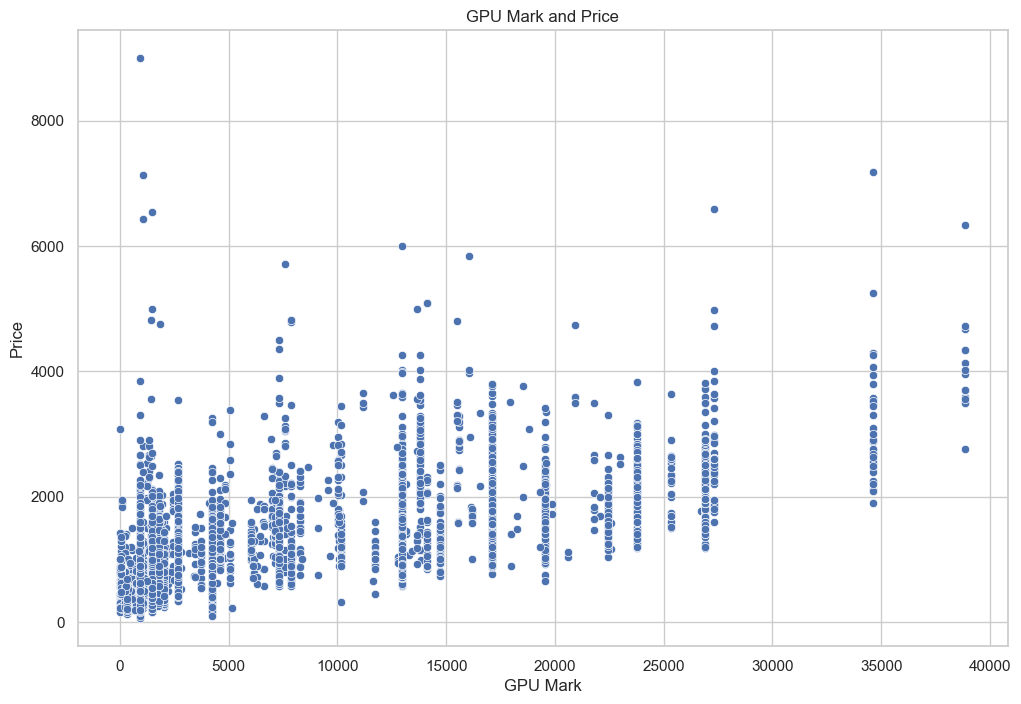

In [10]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='GPU Mark', y='Price', data=df)
plt.title('GPU Mark and Price')
plt.xlabel('GPU Mark')
plt.ylabel('Price')
plt.show()

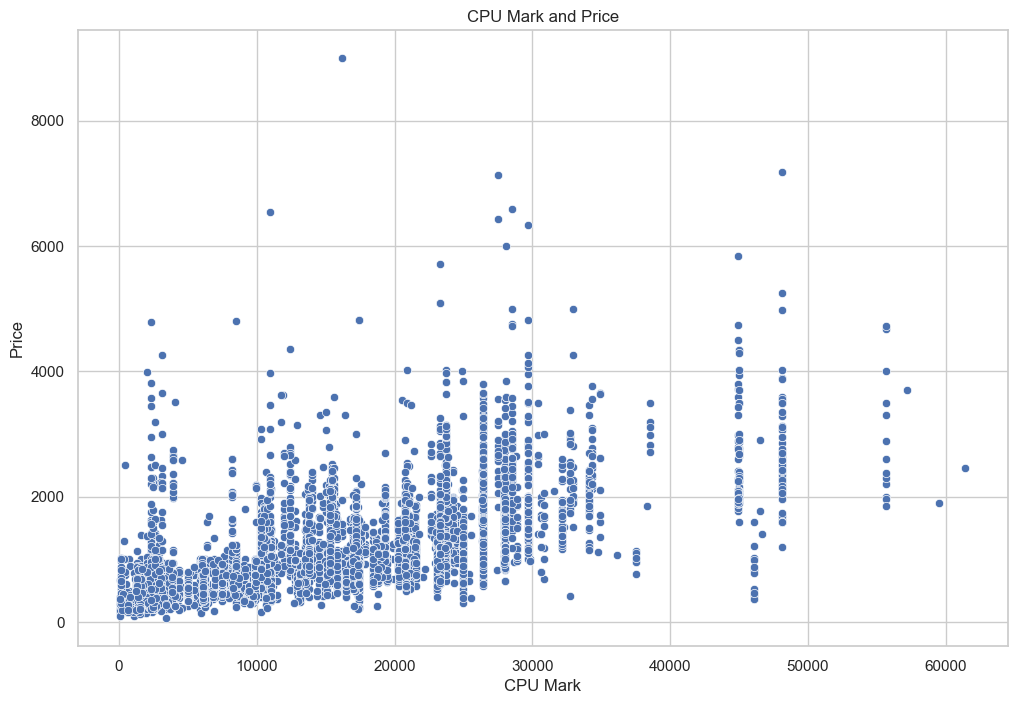

In [11]:
# Set up the Seaborn style
sns.set(style="whitegrid")

# Create a scatter plot with regression line
plt.figure(figsize=(12, 8))
sns.scatterplot(x='CPU Mark', y='Price', data=df)
plt.title('CPU Mark and Price')
plt.xlabel('CPU Mark')
plt.ylabel('Price')
plt.show()

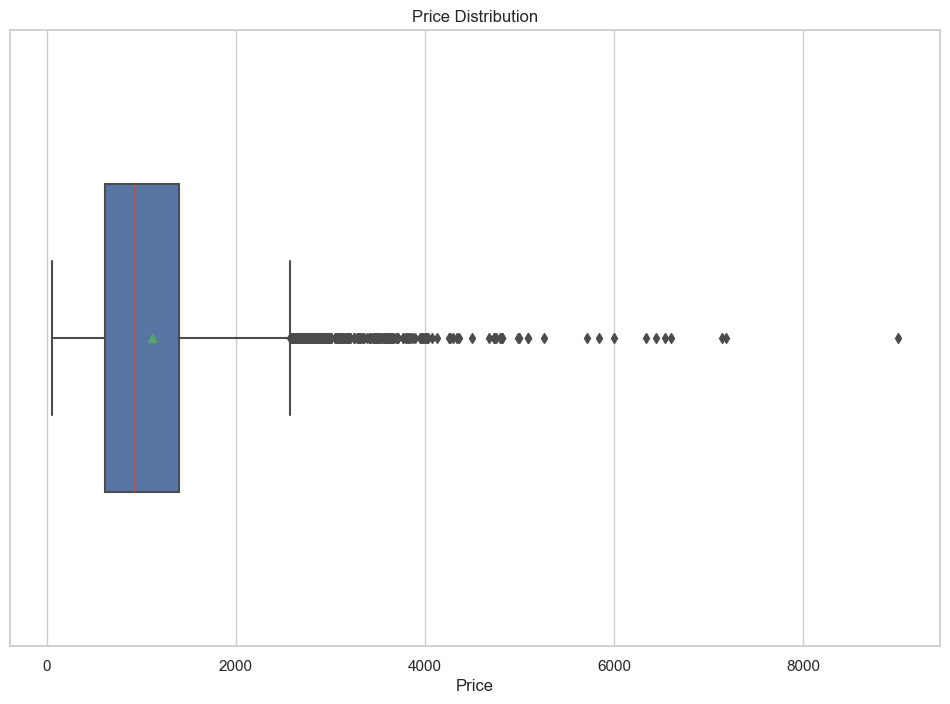

In [12]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(data=df, x='Price',  width=0.5,showmeans=True, medianprops={"color": "r", "linewidth": 0.8})
plt.title('Price Distribution')
plt.show()